In [2]:
%load_ext autoreload
%autoreload 2

from market_report_utils import TSAPassengerDataCollector
import pandas as pd
from datetime import datetime
import pandas as pd
import numpy as np
from pathlib import Path


ROOT_DIR = Path().cwd().parent
DATA_DIR = ROOT_DIR / "data/TSA"




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


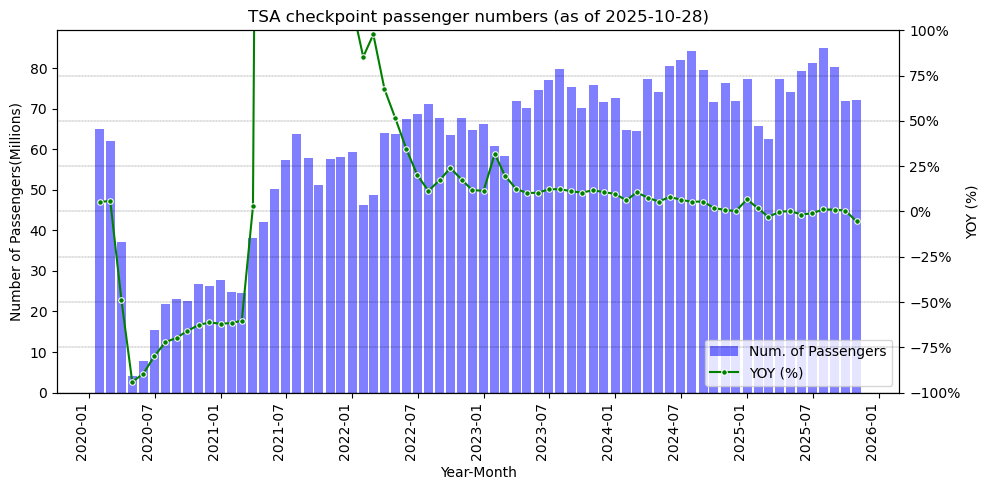

In [ ]:
data_collector = TSAPassengerDataCollector()
tsa_data_list = [data_collector.scrape_tsa_passenger_data()]
for year in np.arange(2019, datetime.now().year):
    tsa_data = data_collector.scrape_tsa_passenger_data(year=year)
    tsa_data_list.append(tsa_data)
tsa_data = pd.concat(tsa_data_list).sort_values("Date", ignore_index=True)
latest_date = tsa_data["Date"].max().strftime("%Y%m%d")

# save to csv
tsa_data.to_csv(DATA_DIR / f"tsa_passenger_volumes_{latest_date}.csv", index=False)
tsa_data = tsa_data.set_index("Date").sort_index()
tsa_data.index = pd.to_datetime(tsa_data.index)

# display(tsa_data)

# plot
fig = data_collector.plot_passenger_trend(tsa_data)
fig.savefig(DATA_DIR / f"tsa_checkpoint_passenger_numbers.png", dpi=300)
